In [6]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import fluids as fl
from pint import _DEFAULT_REGISTRY as u

In [7]:
#converter function
def convertFunc():
    massFlow = 0.094*(u.kilogram/u.second)
    density = 69.205*(u.kilogram/u.meter**3)
    viscosity = 17.720*(u.micropascal*u.second)
    roughness = 0.00001*(u.meter)
    minDiam = 0.1*(u.inch)
    maxDiam = 5*(u.inch)
    diamStep = 0.01*(u.inch)
    straightLength = 2*(u.meter)
    bendAngle = 45*(u.degrees)
    
    # add innumbends anglebends fittings valves

    #variables to standard units
    massFlowS = massFlow.to("kilogram/second")
    densityS = density.to("kilogram/meter**3")
    viscosityS = viscosity.to("pascal*second")
    roughnessS = roughness.to("meter")
    minDiamS = minDiam.to("meter")
    maxDiamS = maxDiam.to("meter")
    diamStepS = diamStep.to("meter")
    straightlengthS = straightLength.to("meter")
    bendAngleS = bendAngle.to("degrees")
    return massFlowS, densityS, viscosityS, roughnessS, minDiamS, maxDiamS, diamStepS, straightlengthS
    
#def printFunc():
    #massFlow, density, viscosity, roughness, minDiam, maxDiam, diamStep, straightLength = convertFunc()

    #print(massFlow, density, viscosity, roughness, minDiam, maxDiam, diamStep, straightLength)

    #add dictionary to easily assign numbers to variables

#printFunc()

In [8]:
def variablesFunc():
    #Input Variables, Units are Assigned
    massFlow, density, viscosity, roughness, minDiam, maxDiam, diamStep, straightLength = convertFunc()
    
    #Calculated Variables
    diamRange = (np.arange(minDiam.magnitude, maxDiam.magnitude, diamStep.magnitude))*(u.meter)
    areaRange = np.square(diamRange / (2*u.dimensionless)) * np.pi*(u.dimensionless)
    velocityRange = np.divide((massFlow), (areaRange * density))

    #Creating Empty Arrays For Variable Ranges
    reynoldsRange = np.empty(len(diamRange))
    frictionFactorRange = np.empty(len(diamRange))
    kFactorRange = np.empty(len(diamRange))
    pressureDropRange = np.empty(len(diamRange))
    

    #Iterating Through Diameters, Calculating Variable Ranges
    for i in np.arange(0, len(diamRange), 1):
        reynoldsRange[i] = fl.units.Reynolds(V=velocityRange[i], mu = viscosity, rho = density, D = diamRange[i])
        frictionFactorRange[i] = fl.units.friction_factor(Re = reynoldsRange[i], eD = np.divide(roughness,diamRange[i]), Darcy = True)
        kFactorRange[i] = fl.units.K_from_f(fd = frictionFactorRange[i], L = straightLength, D = diamRange[i])
        pressureDrop = fl.units.dP_from_K(K = kFactorRange[i], rho = density, V = velocityRange[i]) #Variable to temporarily store pressure drop

        pressureDropRange[i] = pressureDrop.magnitude #Array collects all pressure drop values
        
    pressureDropRange = pressureDropRange * pressureDrop.units #Unit is taken from the last pressure drop value and added here (done bc you can't add pint quantities to np arrays)

    #Plots Diameter Against Pressure Drop
    fig, ax = plt.subplots()
    varPlot = ax.plot(diamRange.to("inch"), pressureDropRange.to("psi"))
    ax.grid(visible = True)
    ax.set_xscale('linear')
    ax.set_yscale('linear')
    ax.set_xlabel("Diameter (Inches)")
    ax.set_ylabel("Pressure Drop (psi)")
    plt.axvline(x = 0.165, color = 'r', linestyle = '-')
    plt.xticks(np.arange(0, 5+0.5, 0.25), rotation = 'vertical')
    plt.show()

    return density, velocityRange, diamRange, straightLength, frictionFactorRange, pressureDropRange

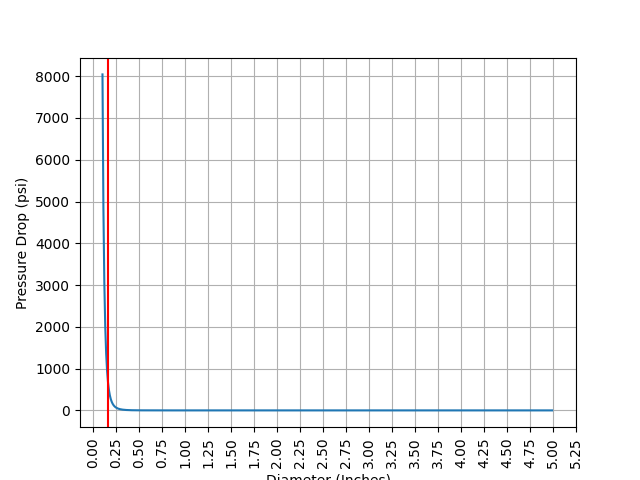

(69.205 <Unit('kilogram / meter ** 3')>,
 array([2.68060650e+02, 2.21537727e+02, 1.86153229e+02, 1.58615769e+02,
        1.36765638e+02, 1.19138067e+02, 1.04711191e+02, 9.27545501e+01,
        8.27347685e+01, 7.42550276e+01, 6.70151624e+01, 6.07847278e+01,
        5.53844318e+01, 5.06730907e+01, 4.65383073e+01, 4.28897040e+01,
        3.96539423e+01, 3.67710082e+01, 3.41914094e+01, 3.18740368e+01,
        2.97845166e+01, 2.78939282e+01, 2.61777978e+01, 2.46153030e+01,
        2.31886375e+01, 2.18825020e+01, 2.06836921e+01, 1.95807633e+01,
        1.85637569e+01, 1.76239743e+01, 1.67537906e+01, 1.59464991e+01,
        1.51961820e+01, 1.44976014e+01, 1.38461079e+01, 1.32375630e+01,
        1.26682727e+01, 1.21349321e+01, 1.16345768e+01, 1.11645418e+01,
        1.07224260e+01, 1.03060611e+01, 9.91348557e+00, 9.54292096e+00,
        9.19275205e+00, 8.86150908e+00, 8.54785235e+00, 8.25055863e+00,
        7.96850921e+00, 7.70067940e+00, 7.44612916e+00, 7.20399489e+00,
        6.97348204e+00,

In [9]:
variablesFunc()


In [10]:
#ALL DEBUGGING
#PROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELL
testPDrop = fl.units.dP_from_K(K = 1.0, rho = 1.0*(u.kilogram / u.meter **3), V = 1.0*(u.meter / u.second))
print(testPDrop)

a = [1, 2, 3]
b = 1 * (u.kilogram / u.meter **3)
c = [1, 2, 3] * (u.meter / u.second)
AHH = np.empty(1)

A = 1 * u.meter
B = 2 * u.meter

bruh = np.empty(1)

bruh = [A, B]
print(bruh)

AHHRange = np.empty(len(a))

for i in np.arange(0, len(a), 1):
    AHH = fl.units.dP_from_K(K = a[i], rho = b, V = c[i])
    AHHRange[i] = AHH.magnitude

print(AHHRange * AHH.units)

0.5 pascal
[<Quantity(1, 'meter')>, <Quantity(2, 'meter')>]
[0.5 4.0 13.5] pascal
